In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [186]:
df = pd.read_csv(r"c:\Users\emirc\OneDrive\Masaüstü\Apolets\amazon_sales_dataset.csv")
df.head()

,order_id,order_date,product_id,product_category,price,discount_percent,quantity_sold,customer_region,payment_method,rating,review_count,discounted_price,total_revenue
0,1,2022-04-13,2637,Books,128.75,10,4,North America,UPI,3.5,443,115.88,463.52
1,2,2023-03-12,2300,Fashion,302.60,20,5,Asia,Credit Card,3.7,475,242.08,1210.40
2,3,2022-09-28,3670,Sports,495.80,20,2,Europe,UPI,4.4,183,396.64,793.28
3,4,2022-04-17,2522,Books,371.95,15,4,Middle East,UPI,5.0,212,316.16,1264.64
4,5,2022-03-13,1717,Beauty,201.68,0,4,Middle East,UPI,4.6,308,201.68,806.72


In [187]:
df["order_date"] = pd.to_datetime(df["order_date"])
mindat = df["order_date"].min()
maxdat = df["order_date"].max()
print(f"en erken tarih: {mindat.date()}\n en geç tarih: {maxdat.date()}")

en erken tarih: 2022-01-01
 en geç tarih: 2023-12-31


In [188]:
df.groupby("product_category")["price"].agg(["min", "max", "mean","count","median","std"])

,min,max,mean,count,median,std
product_category,,,,,,
Beauty,5.30,499.93,252.405289,8465,252.560,142.298185
Books,5.01,499.96,252.682468,8327,254.830,142.819741
Electronics,5.04,499.99,251.893404,8320,251.105,142.716925
Fashion,5.44,499.99,252.347879,8365,252.600,143.593115
Home & Kitchen,5.03,499.89,253.812631,8258,255.100,143.551335
Sports,5.02,499.91,251.910161,8265,251.360,143.218638


In [189]:
df.groupby(df["order_date"].dt.year)["product_category"].value_counts()


order_date  product_category
2022        Sports              4192
            Beauty              4175
            Books               4159
            Fashion             4153
            Electronics         4131
            Home & Kitchen      4116
2023        Beauty              4290
            Fashion             4212
            Electronics         4189
            Books               4168
            Home & Kitchen      4142
            Sports              4073
Name: count, dtype: int64

In [190]:
#Spor ürünleri ve güzellik ürünleri arasında anlamlı bir fark var mı?:
from scipy.stats import chi2_contingency
sporveguzellik =pd.crosstab(df["order_date"].dt.year,df["product_category"])
chi2,p,dof,expected = chi2_contingency(sporveguzellik)
print("Chi-kare istatistiği:",chi2)
print("p-değeri:",p)
print("Serbestlik derecesi:",dof)
print("Beklenen değerler:\n",expected)
if p<0.05:
    print("Spor ürünleri ve güzellik ürünleri arasında anlamlı bir fark vardır.")
else:
    print("Spor ürünleri ve güzellik ürünleri arasında anlamlı bir fark yoktur.")

Chi-kare istatistiği: 3.7496909041556696
p-değeri: 0.585986893950784
Serbestlik derecesi: 5
Beklenen değerler:
 [[4219.9718  4151.17604 4147.6864  4170.1198  4116.77816 4120.2678 ]
 [4245.0282  4175.82396 4172.3136  4194.8802  4141.22184 4144.7322 ]]
Spor ürünleri ve güzellik ürünleri arasında anlamlı bir fark yoktur.


<Axes: xlabel='price', ylabel='Count'>

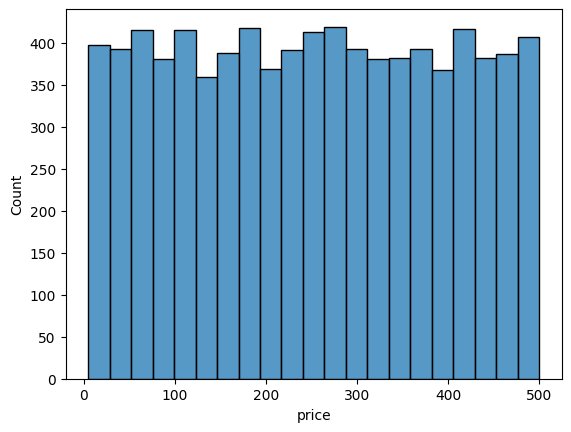

In [191]:
spor_urunleri = df[df["product_category"]=="Sports"]

sns.histplot(data=spor_urunleri,x="price")


In [192]:
ulkelere_gore_fiyat_ortalamasi = df.groupby("customer_region")["price"].median().reset_index()
ulkelere_gore_fiyat_ortalamasi

,customer_region,price
0,Asia,253.11
1,Europe,250.41
2,Middle East,253.43
3,North America,254.76


In [193]:
df.groupby(["customer_region","product_category"]).agg({"price":["mean","std"]})

price            
                                        mean         std
customer_region product_category                        
Asia            Beauty            256.095926  140.929746
                Books             253.426687  144.028878
                Electronics       248.554180  142.462089
                Fashion           251.029274  145.617614
                Home & Kitchen    252.900034  142.593402
                Sports            250.953774  145.136106
Europe          Beauty            249.633464  144.028200
                Books             250.468752  144.212617
                Electronics       254.860994  140.858966
                Fashion           248.657576  143.844560
                Home & Kitchen    255.139047  144.279464
                Sports            251.146203  141.469844
Middle East     Beauty            252.787118  142.626156
                Books             254.521084  140.444504
                Electronics       252.658236  142.804100
                Fashion           253.567715  143.098840
                Home & Kitchen    253.947163  142.767105
                Sports            250.942350  142.285053
North America   Beauty            251.154473  141.623527
                Books             252.191723  142.644981
                Electronics       251.521431  144.746864
                Fashion           256.146975  141.849868
                Home & Kitchen    253.297047  144.667651
                Sports            254.581561  144.014405

In [194]:
uc_degiskenli = df.pivot_table(values="total_revenue",index=["customer_region"],columns="product_category",aggfunc="mean")

uc_degiskenli.unstack()


product_category  customer_region
Beauty            Asia               667.261742
                  Europe             643.709204
                  Middle East        663.342237
                  North America      648.829635
Books             Asia               643.235531
                  Europe             653.571439
                  Middle East        676.081434
                  North America      662.199513
Electronics       Asia               630.834271
                  Europe             675.849635
                  Middle East        668.431575
                  North America      655.188603
Fashion           Asia               658.679778
                  Europe             639.263921
                  Middle East        663.277004
                  North America      659.687802
Home & Kitchen    Asia               659.449422
                  Europe             655.024474
                  Middle East        661.320442
                  North America      675.089123
Sports

In [195]:
degerlendirme_ort = df.groupby("customer_region")["rating"].mean()

print(degerlendirme_ort)


customer_region
Asia             2.995721
Europe           2.973651
Middle East      3.015434
North America    3.000360
Name: rating, dtype: float64


In [196]:
asya = df[df["customer_region"] == "Asia"]
avrupa = df[df["customer_region"] == "Europe"]
amerika = df[df["customer_region"] == "America"]

print(asya)
print(avrupa)
print(amerika)

       order_id order_date  product_id product_category   price  \
1             2 2023-03-12        2300          Fashion  302.60   
5             6 2023-12-02        1777           Sports  385.17   
6             7 2022-01-21        4068            Books   15.78   
8             9 2022-05-02        3262            Books  373.62   
18           19 2023-10-24        1968   Home & Kitchen  262.36   
...         ...        ...         ...              ...     ...   
49986     49987 2022-11-07        4956      Electronics  338.40   
49987     49988 2023-01-30        4670            Books  166.87   
49990     49991 2023-04-08        2689           Beauty  265.49   
49996     49997 2022-07-03        1428           Beauty  294.23   
49997     49998 2023-02-17        4651      Electronics  352.11   

       discount_percent  quantity_sold customer_region    payment_method  \
1                    20              5            Asia       Credit Card   
5                    30              3     

In [197]:
from scipy.stats import f_oneway
gruplar = [df["rating"].values for name, group in df.groupby("customer_region")]
f_oneway(*gruplar)

f_stat, p_value = f_oneway(*gruplar)
print(f"ANOVA P-Değeri: {p_value}")

if p_value < 0.05:
    print("En az bir bölge diğerlerinden anlamlı derecede farklı.")
else:
    print("Bölgeler arasında anlamlı bir fark yok.")

ANOVA P-Değeri: 1.0
Bölgeler arasında anlamlı bir fark yok.


In [198]:
df.groupby("customer_region")["review_count"].sum()
review_pivot = df.pivot_table(index=["customer_region", "product_category"], values="review_count", aggfunc="sum").unstack()
review_pivot

review_count                                             \
product_category       Beauty   Books Electronics Fashion Home & Kitchen   
customer_region                                                            
Asia                   523112  528482      522777  503293         518691   
Europe                 511148  510654      519683  529645         506966   
Middle East            516412  526754      509149  523784         526055   
North America          545100  495643      513829  535814         524680   

                          
product_category  Sports  
customer_region           
Asia              511738  
Europe            523147  
Middle East       518127  
North America     521781

In [199]:
df.groupby("customer_region")["review_count"].sum()
sold_pivot = df.pivot_table(index=["customer_region", "product_category"], values="quantity_sold", aggfunc="sum").unstack()
sold_pivot


quantity_sold                                                
product_category        Beauty Books Electronics Fashion Home & Kitchen Sports
customer_region                                                               
Asia                      6317  6378        6127    6138           6220   6260
Europe                    6321  6142        6296    6396           6017   6130
Middle East               6284  6517        6259    6303           6156   6175
North America             6500  6028        6216    6252           6350   6188

In [200]:
# Mevcut pivot tablonu dataframe'e çevirip indeksleri sütuna taşır
df_finalreview = review_pivot.reset_index()

# Eğer sütun başlıklarındaki "review_count" yazısını silmek istersen:
df_finalreview.columns = [col[1] if isinstance(col, tuple) and col[1] else col[0] for col in df_finalreview.columns]

In [201]:
# Mevcut pivot tablonu dataframe'e çevirip indeksleri sütuna taşır
df_finalsold = sold_pivot.reset_index()

# Eğer sütun başlıklarındaki "review_count" yazısını silmek istersen:
df_finalsold.columns = [col[1] if isinstance(col, tuple) and col[1] else col[0] for col in df_finalsold.columns]

In [202]:
df_oran = df_finalsold.iloc[:, 1:] / df_finalreview.iloc[:, 1:]
df_oran.insert(0, "customer_region", df_finalreview.iloc[:, 0])
df_oran.iloc[:, 1:] = df_oran.iloc[:, 1:] * 100
df_oran
#demek ki asyalılar aldıkları elektronik ürünlere daha fazla yorum yapıyorlar
#Avrupalılar da ev ve bahçe ürünlerine daha fazla yorum yapıyorlar bir de spor ürünlerine
#amerikalılar da kişisel bakım ürünlerine daha fazla yorum yapıyorlar
#Spor ürünlerine en fazla yorum yapanlar asyalılar

,customer_region,Beauty,Books,Electronics,Fashion,Home & Kitchen,Sports
0,Asia,1.207581,1.206853,1.172010,1.219568,1.199173,1.223282
1,Europe,1.236628,1.202771,1.211508,1.207601,1.186865,1.171755
2,Middle East,1.216858,1.237200,1.229306,1.203359,1.170220,1.191793
3,North America,1.192442,1.216198,1.209741,1.166823,1.210261,1.185938


In [203]:
alinan_miktarlar = df.pivot_table(index=["product_category","quantity_sold","customer_region"],values="price",aggfunc="median").unstack()
alinan_miktarlar

price                                   
customer_region                    Asia   Europe Middle East North America
product_category quantity_sold                                            
Beauty           1              278.355  267.680     246.390       249.705
                 2              240.495  250.630     244.420       260.380
                 3              260.500  236.830     241.295       259.600
                 4              257.835  247.735     274.990       242.695
                 5              267.650  231.625     254.020       246.910
Books            1              249.365  239.855     264.560       256.160
                 2              267.315  271.220     254.175       247.490
                 3              241.670  239.070     272.040       241.885
                 4              248.725  250.455     249.780       253.890
                 5              260.370  256.190     246.740       272.000
Electronics      1              248.215  246.010     247.190       247.480
                 2              271.680  250.085     251.515       241.735
                 3              223.235  262.770     237.985       254.005
                 4              248.670  248.400     246.460       248.190
                 5              257.210  265.805     271.465       259.010
Fashion          1              255.875  261.740     256.500       249.410
                 2              232.455  258.270     243.080       271.985
                 3              248.380  237.280     254.210       259.215
                 4              256.345  234.785     247.220       260.395
                 5              237.085  244.400     258.505       258.940
Home & Kitchen   1              264.800  252.490     251.570       237.970
                 2              259.965  256.890     248.320       270.790
                 3              234.070  256.030     257.770       257.000
                 4              255.510  260.585     251.405       252.680
                 5              260.100  254.440     277.430       249.890
Sports           1              252.140  249.020     251.770       246.850
                 2              240.500  246.850     261.090       255.550
                 3              233.640  255.215     234.670       243.060
                 4              281.565  245.970     248.500       265.680
                 5              246.745  252.840     253.720       262.665

In [204]:
df_alinan_miktarlar = alinan_miktarlar.reset_index()
df_alinan_miktarlar.columns = [col[1] if isinstance(col,tuple) and col[1] else col[0] for col in df_alinan_miktarlar.columns]
df_alinan_miktarlar

,product_category,quantity_sold,Asia,Europe,Middle East,North America
0,Beauty,1,278.355,267.680,246.390,249.705
1,Beauty,2,240.495,250.630,244.420,260.380
2,Beauty,3,260.500,236.830,241.295,259.600
3,Beauty,4,257.835,247.735,274.990,242.695
4,Beauty,5,267.650,231.625,254.020,246.910
5,Books,1,249.365,239.855,264.560,256.160
6,Books,2,267.315,271.220,254.175,247.490
7,Books,3,241.670,239.070,272.040,241.885
8,Books,4,248.725,250.455,249.780,253.890
9,Books,5,260.370,256.190,246.740,272.000


In [205]:
ortalama_fiyatlar=  df_alinan_miktarlar.iloc[:,2:].mean()
medyan_fiyatlar=  df_alinan_miktarlar.iloc[:,2:].median()
maximum_fiyatlar=  df_alinan_miktarlar.iloc[:,2:].max()
minimum_fiyatlar=  df_alinan_miktarlar.iloc[:,2:].min()
print("ortalama""\n",ortalama_fiyatlar,"\n","medyan""\n", medyan_fiyatlar,"\n","maximum""\n",maximum_fiyatlar,"\n","minimum""\n",minimum_fiyatlar)

ortalama
 Asia             252.682167
Europe           251.038833
Middle East      253.292833
North America    254.107167
dtype: float64 
 medyan
 Asia             253.8250
Europe           250.5425
Middle East      251.5425
North America    253.9475
dtype: float64 
 maximum
 Asia             281.565
Europe           271.220
Middle East      277.430
North America    272.000
dtype: float64 
 minimum
 Asia             223.235
Europe           231.625
Middle East      234.670
North America    237.970
dtype: float64


In [206]:
df_alinan_miktarlar["asyagain"] = df_alinan_miktarlar["quantity_sold"]*df_alinan_miktarlar["Asia"]
df_alinan_miktarlar["avrupagain"] = df_alinan_miktarlar["quantity_sold"]*df_alinan_miktarlar["Europe"]
df_alinan_miktarlar["afrikagain"] = df_alinan_miktarlar["quantity_sold"]*df_alinan_miktarlar["Middle East"]
df_alinan_miktarlar["amerikagain"] = df_alinan_miktarlar["quantity_sold"]*df_alinan_miktarlar["North America"]
df_hasila = df_alinan_miktarlar.iloc[:,6:]


In [207]:
df_hasila = df_alinan_miktarlar.iloc[:,[0,1,2,6,7,8,9]]
df_hasila

,product_category,quantity_sold,Asia,asyagain,avrupagain,afrikagain,amerikagain
0,Beauty,1,278.355,278.355,267.680,246.390,249.705
1,Beauty,2,240.495,480.990,501.260,488.840,520.760
2,Beauty,3,260.500,781.500,710.490,723.885,778.800
3,Beauty,4,257.835,1031.340,990.940,1099.960,970.780
4,Beauty,5,267.650,1338.250,1158.125,1270.100,1234.550
5,Books,1,249.365,249.365,239.855,264.560,256.160
6,Books,2,267.315,534.630,542.440,508.350,494.980
7,Books,3,241.670,725.010,717.210,816.120,725.655
8,Books,4,248.725,994.900,1001.820,999.120,1015.560
9,Books,5,260.370,1301.850,1280.950,1233.700,1360.000


In [208]:
df_alinan_miktarlar = df_alinan_miktarlar.iloc[:,:6]
df_alinan_miktarlar


,product_category,quantity_sold,Asia,Europe,Middle East,North America
0,Beauty,1,278.355,267.680,246.390,249.705
1,Beauty,2,240.495,250.630,244.420,260.380
2,Beauty,3,260.500,236.830,241.295,259.600
3,Beauty,4,257.835,247.735,274.990,242.695
4,Beauty,5,267.650,231.625,254.020,246.910
5,Books,1,249.365,239.855,264.560,256.160
6,Books,2,267.315,271.220,254.175,247.490
7,Books,3,241.670,239.070,272.040,241.885
8,Books,4,248.725,250.455,249.780,253.890
9,Books,5,260.370,256.190,246.740,272.000


<Axes: xlabel='Asia', ylabel='quantity_sold'>

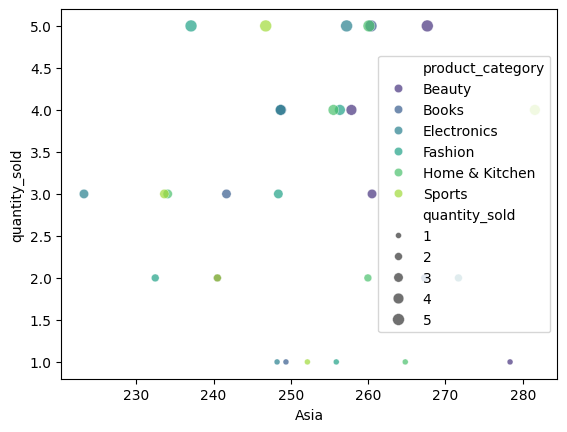

In [217]:
sns.scatterplot(data=df_alinan_miktarlar,x="Asia",y="quantity_sold",hue="product_category",palette="viridis",size = "quantity_sold",alpha=0.7)

<Axes: xlabel='North America', ylabel='quantity_sold'>

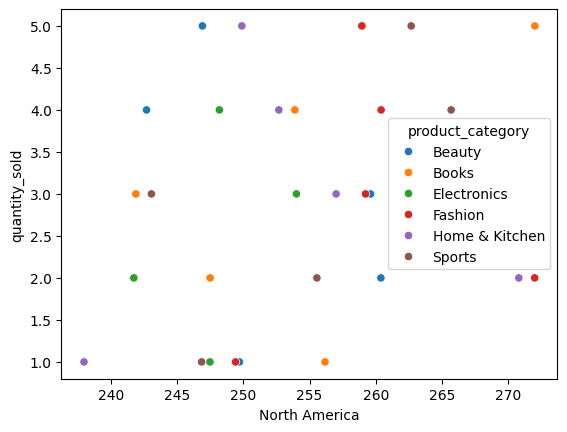

In [210]:
sns.scatterplot(data=df_alinan_miktarlar,x="North America",y="quantity_sold",hue="product_category")

<Axes: xlabel='Middle East', ylabel='quantity_sold'>

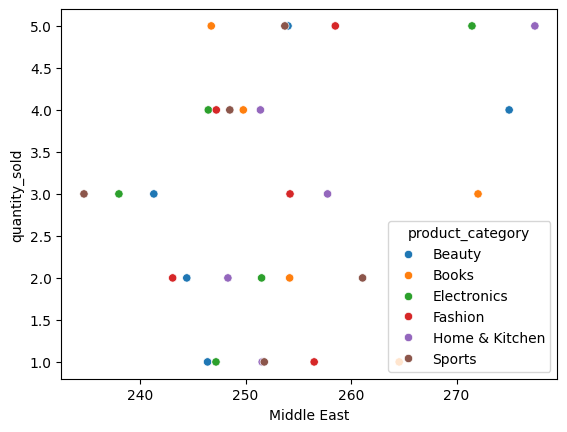

In [211]:
sns.scatterplot(data=df_alinan_miktarlar,x="Middle East",y="quantity_sold",hue="product_category")

<Axes: xlabel='Europe', ylabel='quantity_sold'>

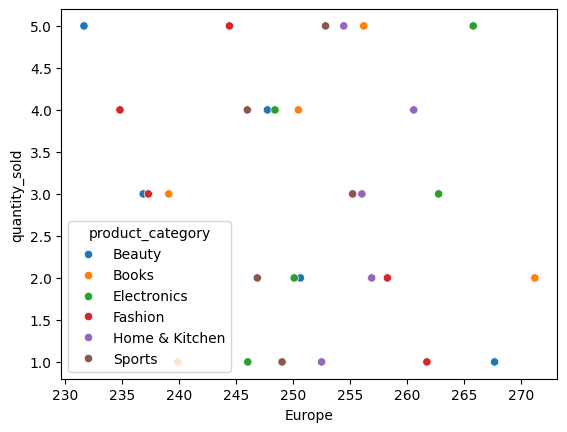

In [212]:
sns.scatterplot(data=df_alinan_miktarlar,x="Europe",y="quantity_sold",hue="product_category")